We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please uncomment the following command and execute:

In [3]:
# !sudo python3 -m pip install -U pandas

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [4]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

### Basic Example: Creating a DataFrame from Scratch

This is an example of creating a dataframe by passing a list of dictionaries.

In [5]:
df = pd.DataFrame([ 
    {"First Name": "Panos", "Last Name":" Ipeirotis"},
    {"First Name": "John", "Last Name":" Doe"},
    {"Last Name":"Trump"}
])


In [6]:
df

,First Name,Last Name
0,Panos,Ipeirotis
1,John,Doe
2,NaN,Trump


### Reading Data Files

Let's take a look at the restaurant inspections file (at `data/restaurants.csv`), which we used in our earlier classes.

If you do not have it, then uncomment and execute the following:

In [7]:
!mkdir data

In [8]:
!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  135M    0  135M    0     0  4537k      0 --:--:--  0:00:30 --:--:-- 4773k


In [9]:
!rm data/restaurant.csv.gz

rm: cannot remove 'data/restaurant.csv.gz': No such file or directory


In [10]:
!gzip data/restaurant.csv

In [11]:
!gzip -cd data/restaurant.csv.gz | head -3

CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
41626466,THE FLAT,BROOKLYN,308,HOOPER STREET,11211,7185995151,American,05/15/2015,Violations were cited in the following area(s).,04J,"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",Critical,23,,,01/21/2018,Cycle Inspection / Initial Inspection
50049789,FIVE STAR DELI & GRILL,BROOKLYN,3018,CHURCH AVE,11226,7189751130,Indian,10/11/2017,Violations were cited in the following area(s).,04J,"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",Critical,46,,,01/21/2018,Pre-permit (Non-operational) / Initial Inspection

gzip: std

### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [31]:
import pandas as pd
restaurants = pd.read_csv("data/restaurant.csv.gz", 
                          encoding='utf_8', 
                          dtype = 'unicode',
                          parse_dates = True,
                          infer_datetime_format = True,
                          low_memory=False)

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [32]:
restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41626466,THE FLAT,BROOKLYN,308,HOOPER STREET,11211,7185995151,American,05/15/2015,Violations were cited in the following area(s).,04J,Appropriately scaled metal stem-type thermomet...,Critical,23,NaN,NaN,01/21/2018,Cycle Inspection / Initial Inspection
1,50049789,FIVE STAR DELI & GRILL,BROOKLYN,3018,CHURCH AVE,11226,7189751130,Indian,10/11/2017,Violations were cited in the following area(s).,04J,Appropriately scaled metal stem-type thermomet...,Critical,46,NaN,NaN,01/21/2018,Pre-permit (Non-operational) / Initial Inspection
2,40559633,GOTHAM CAFE (INSIDE THE WATSON HOTEL),MANHATTAN,440,WEST 57 STREET,10019,2126346115,American,06/01/2015,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,11,A,06/01/2015,01/21/2018,Cycle Inspection / Re-inspection
3,50057072,MD BAGELS,STATEN ISLAND,434,CASTLETON AVE,10301,7188764960,Delicatessen,12/08/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,25,NaN,NaN,01/21/2018,Pre-permit (Operational) / Initial Inspection
4,41567414,AMC THEATRES,MANHATTAN,234,WEST 42 STREET,10036,2123982597,American,08/19/2017,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11,A,08/19/2017,01/21/2018,Cycle Inspection / Initial Inspection


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [33]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,387040,386658,387040,386907,387036,387036,387024,387040,387040,385888,380942,380188,387040,365347,191506,189308,387040,385888
unique,26693,21063,6,7275,3311,234,25315,85,1451,5,99,93,3,121,6,1355,1,34
top,50033122,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,10003,7186566210,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,12,A,01/18/2018,01/21/2018,Cycle Inspection / Initial Inspection
freq,97,4310,153880,2151,13958,10316,202,86904,1152,366846,54038,54038,212250,38904,152153,478,387040,222220


We can also check the data types for each column

In [34]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
dtype: object

#### Converting Data Types

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions:

In [35]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

#### Descriptive Statistics

And now that SCORE is a numeric variable, we can examine its distribution by using the `hist` command of Pandas, which creates a histogram.

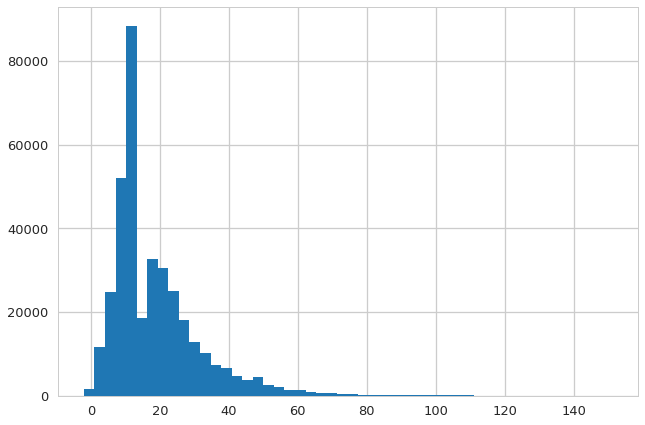

In [36]:
restaurants["SCORE"].hist(bins=50)

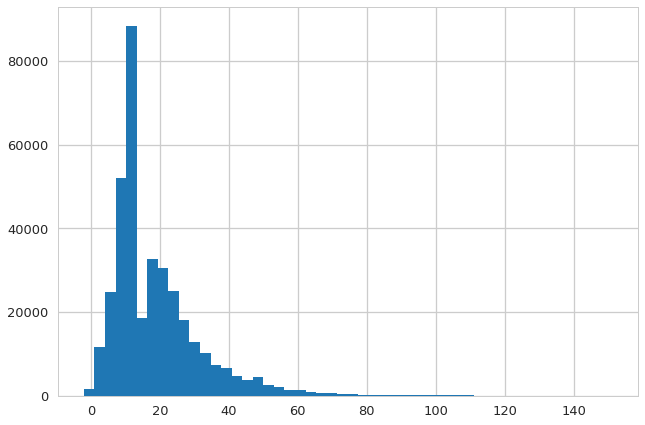

In [37]:
# For column names without a space, we can also access directly the column as follows:
restaurants.SCORE.hist(bins=50)

In [38]:
restaurants.SCORE.describe()

count    365347.000000
mean         18.926752
std          13.053355
min          -2.000000
25%          11.000000
50%          14.000000
75%          24.000000
max         151.000000
Name: SCORE, dtype: float64

### Converting Dates

Now let's convert the dates columns into the appropriate data types. Let's take a look at a few dates.

In [41]:
restaurants["GRADE DATE"].head(10)

0           NaN
1           NaN
2    06/01/2015
3           NaN
4    08/19/2017
5    10/07/2015
6           NaN
7           NaN
8    12/01/2016
9    09/13/2017
Name: GRADE DATE, dtype: object

For that, we need to understand first how to [parse dates using the Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

The relevant entries from the table are:
* `%m` Month as a zero-padded decimal number.
* `%d` 	Day of the month as a zero-padded decimal number.
* `%Y` Year with century as a decimal number.

Now, we can specify how to parse these dates. (In principle, we can let Pandas do this automatically, but it is _much_ faster if we specify it ourselves. It is also much less error-prone.)

In [43]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [44]:
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [21]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,387040,189308,387040
unique,1451,1355,1
top,1900-01-01 00:00:00,2018-01-18 00:00:00,2018-01-21 00:00:00
freq,1152,478,387040
first,1900-01-01 00:00:00,2012-05-01 00:00:00,2018-01-21 00:00:00
last,2018-01-19 00:00:00,2018-01-19 00:00:00,2018-01-21 00:00:00


#### Exercise

* Plot a histogram for `INSPECTION DATE`, `GRADE DATE`, `RECORD DATE`. What do you see?
* Try modifying the `bins` parameter. What are the results?
* The `range=(start, finish)` command is often useful, when we want to focus on a particular part of the dataset. Try using that for  `INSPECTION DATE` to limit the dates to be between 1/1/2012 and 12/31/2017.

In [64]:
# your code here

### Categorical Variables

This is less important, but sometimes we want to specify variables to be "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

In [65]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

### Analyzing the content of the columns

We can also get quick statistics about the common values that appear in each column:

In [48]:
restaurants["DBA"].value_counts()[:10] 

DUNKIN' DONUTS                    4310
SUBWAY                            3563
MCDONALD'S                        2625
STARBUCKS                         2199
DUNKIN' DONUTS, BASKIN ROBBINS    1456
DOMINO'S                          1377
KENNEDY FRIED CHICKEN             1173
BURGER KING                       1097
CROWN FRIED CHICKEN               1058
CHIPOTLE MEXICAN GRILL             936
Name: DBA, dtype: int64

In [50]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5]

American                                                            86904
Chinese                                                             40636
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    18017
Pizza                                                               17932
Italian                                                             17036
Name: CUISINE DESCRIPTION, dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

In [ ]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

In [ ]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

In [51]:
restaurants["VIOLATION CODE"].head(5)

0    04J
1    04J
2    10H
3    04L
4    04L
Name: VIOLATION CODE, dtype: category
Categories (99, object): [02A, 02B, 02C, 02D, ..., 22C, 22E, 22F, 22G]

In [52]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    54038
08A    39769
04L    27258
06C    25837
06D    25501
02G    25135
10B    22186
04N    20011
02B    19136
04H     8546
Name: VIOLATION CODE, dtype: int64

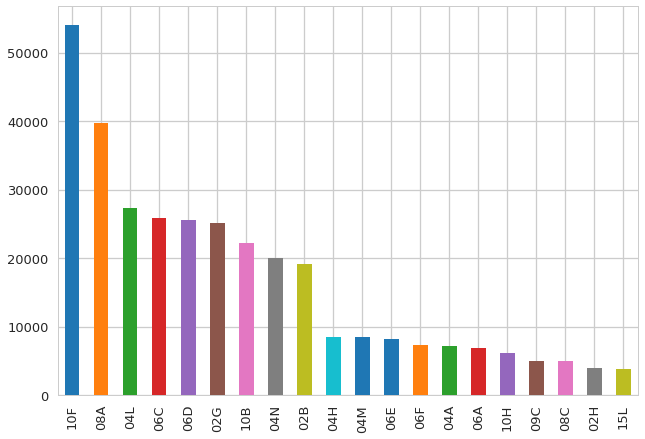

In [53]:
violation_counts[0:20].plot(kind='bar')

#### Exercise

* Create a plot showing the number of inspections that happen across boroughs.

### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [ ]:
column_list = ["INSPECTION DATE","VIOLATION CODE", "DBA", "SCORE"]
restaurants[ column_list ].head(10)

In [ ]:
restaurants[ ["GRADE DATE","VIOLATION CODE", "DBA"] ].head(5)

### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [ ]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice

In [ ]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice

In [ ]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

In [ ]:
has_mice["CAMIS"].value_counts()[:5]

In [ ]:
condition = (restaurants["CAMIS"] == '41444879')
restaurants[condition]

And we can use more complex conditions. 

In [ ]:
mice_manhattan =  ( (restaurants["VIOLATION CODE"] == "04L") 
                    & (restaurants["BORO"] == "MANHATTAN") 
                    & (restaurants["ZIPCODE"] == "10012") )

In [ ]:
has_mice_10012 = restaurants[mice_manhattan]
has_mice_10012

In [ ]:
has_mice_10012["DBA"].value_counts()[:20]

In [ ]:
has_mice_10012["DBA"].value_counts()[:10].plot(kind='bar')

### Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [68]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'CAMIS',  # specifies the content of the cells
    aggfunc = 'count' # we ask to count how many different CAMIS values we see
)

##### Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [69]:
pivot.resample('7D').mean()

,CAMIS
INSPECTION DATE,
1900-01-01,1152.000000
1900-01-08,NaN
1900-01-15,NaN
1900-01-22,NaN
1900-01-29,NaN
1900-02-05,NaN
1900-02-12,NaN
1900-02-19,NaN
1900-02-26,NaN


Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [70]:
pivot.head(5)

,CAMIS
INSPECTION DATE,
1900-01-01,1152
2011-10-07,1
2012-05-01,2
2012-06-23,1
2013-02-28,2


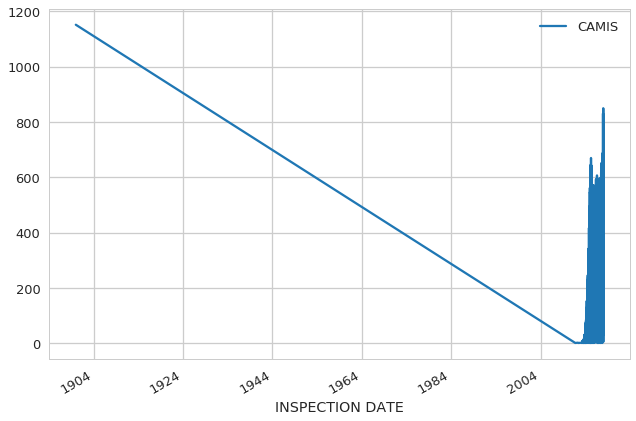

In [71]:
pivot.plot()

#### Deleting rows from a DataFrame

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis=0` parameter means that we delete a **row** with that index value. (The `axis=1` means that we delete a column.)
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [72]:
pivot.drop(pd.to_datetime('1900-01-01'), axis=0, inplace=True) 

And let's plot again.

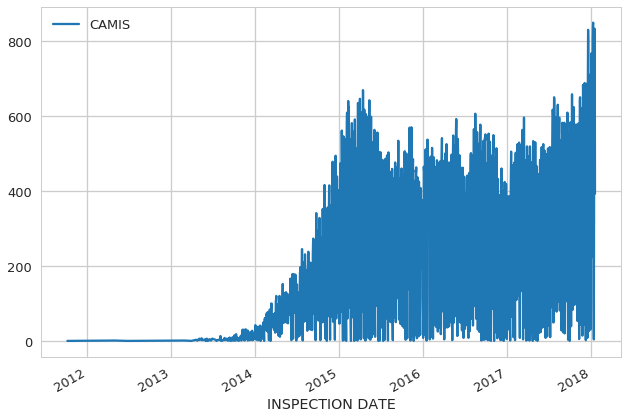

In [73]:
pivot.plot()

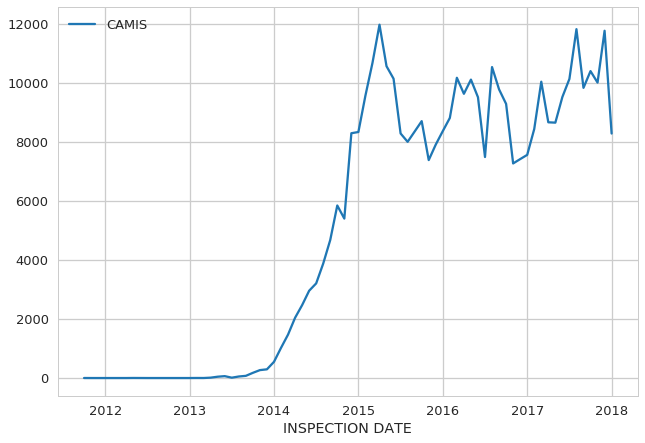

In [74]:
pivot.resample('1M').sum().plot()

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [75]:
pivot2 = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)

In [76]:
pivot2.head(10)

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
INSPECTION DATE,,,,,,
1900-01-01,86.0,293.0,445.0,4.0,296.0,28.0
2011-10-07,NaN,NaN,NaN,NaN,1.0,NaN
2012-05-01,NaN,NaN,NaN,NaN,2.0,NaN
2012-06-23,NaN,NaN,NaN,NaN,1.0,NaN
2013-02-28,NaN,2.0,NaN,NaN,NaN,NaN
2013-03-29,NaN,NaN,1.0,NaN,NaN,NaN
2013-04-19,NaN,NaN,NaN,NaN,4.0,NaN
2013-04-23,NaN,NaN,2.0,NaN,NaN,NaN
2013-04-25,NaN,NaN,4.0,NaN,NaN,NaN


##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'Missing'* columns the same. We can use the `drop` command of Pandas to drop these.

In [77]:
# The "axis=0" means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis=0) 

In [78]:
# The "axis=1" means that we delete a columns with that value
pivot2 = pivot2.drop('Missing', axis=1)

In [79]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample('1M').mean()

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
INSPECTION DATE,,,,,
2011-10-31,NaN,NaN,NaN,1.000000,NaN
2011-11-30,NaN,NaN,NaN,NaN,NaN
2011-12-31,NaN,NaN,NaN,NaN,NaN
2012-01-31,NaN,NaN,NaN,NaN,NaN
2012-02-29,NaN,NaN,NaN,NaN,NaN
2012-03-31,NaN,NaN,NaN,NaN,NaN
2012-04-30,NaN,NaN,NaN,NaN,NaN
2012-05-31,NaN,NaN,NaN,2.000000,NaN
2012-06-30,NaN,NaN,NaN,1.000000,NaN


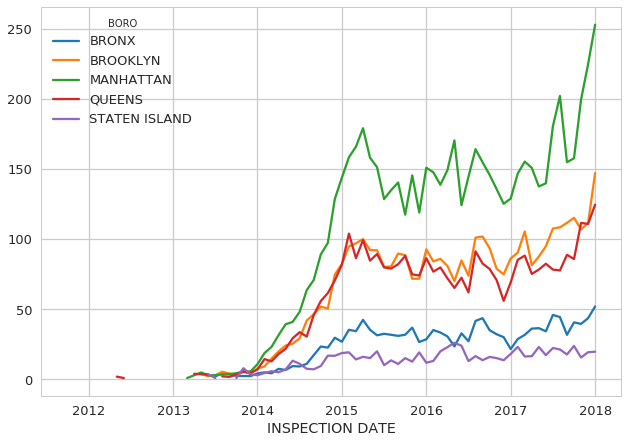

In [80]:
# If we plot a dataframe then by default the index column
# in our case the INSPECTION DATE becomes the x-asis
# and all the columns become separate lines in the plot
pivot2.resample('1M').mean().plot()

### Exercise 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

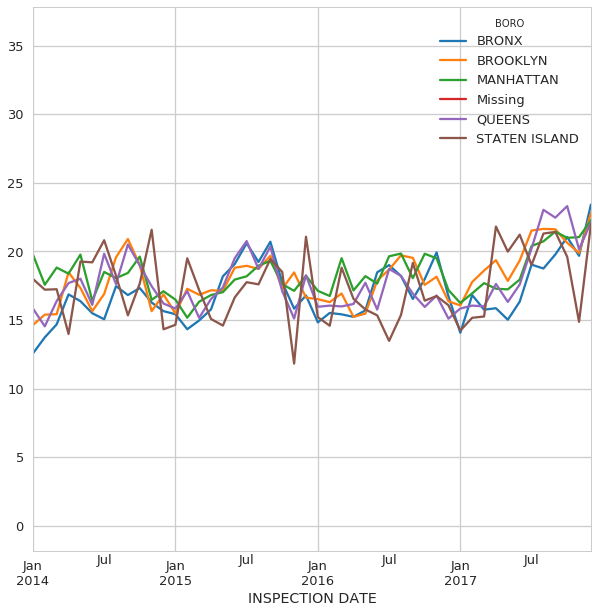

In [82]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    columns = 'BORO',
    values = 'SCORE',  # specifies the content of the cells
    aggfunc = 'mean' # we ask to count how many different CAMIS values we see
)
pivot.resample('1M').mean().plot(
    xlim = (pd.Timestamp('2014-01-01'), pd.Timestamp('2017-12-31')),
    figsize=(10,10) )

### Exercise

* We interacted with the NYC Restaurant Inspection Data. Now, let's download another dataset, and do some analysis. We will focus on the [NYPD Vehicle Collissions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set.


* Task 1: Download the dataset. Use the "Export" view, get the URL for the CSV file, and dowload it using curl. (See the top of the notebook for guidance.) 



* Task 2: Find out the most common contributing factors to the collisions. 
 

   
* Task 3: Break down the number of collisions by borough.





* Task 4: Find out the how many collisions had 0 persons injured, 1 persons injured, etc. persons injured in each accident. Use the `value_counts()` approach. You may also find the `.plot(logy=True)` option useful when you create the plot to make the y-axis logarigthmic.
 

   
* Task 5: Break down the accidents by borough and contributing factor. Use the `pivot_table` function of Pandas
 

 * Task 6: Find the dates with the most accidents. Can you figure out what happened on these days? 



* Task 7: Plot the number of accidents per day. (Hint: Ensure that your date column is in the right datatype and that it is properly sorted, before plotting)


* Task 8: Plot the accidents in map. Use a scatter plot using the `plot(kind='scatter', x=..., y=....)` command, and use the `LATITUDE` and `LONGITUDE` parameters. (Hint: **You will have to remove bad data points before getting into the right visual result**. To do this, specify a selection condition to limit the lat/long values to be values that are proper for the NYC region.)

* Task 9: Plot the accidents in map as above, but limit the data only to accidents with at least one injury.

### Bonus plot

In [ ]:
# In the code below, we create one plot (in blue) for all the accidents
# and another plot (with red dots) for all the accidents with injuries
# We can combine the two plots using the "ax" parameter

# df = pd.read_csv("accidents.csv", low_memory=False)

all_accidents_plot = accidents [
    # We put conditions to keep only rows that 
    # have reasonable values for LONGITUDE and LATITUDE
    (accidents.LATITUDE > 40) & # The & character is the "AND" in Pandas
    (accidents.LATITUDE < 41) & # the df.LATITUDE is equivalent to df['LATITUDE']
    (accidents.LONGITUDE < -50) &
    (accidents.LONGITUDE > -74.5) 
].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20), # changes the size of the plot to be bigger and square
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 1 # make the size of the market just 3 pixel
)

accidents[
    # We put conditions to keep only rows that 
    # have reasonable values for LONGITUDE and LATITUDE
    (accidents.LATITUDE > 40) & # The & character is the "AND" in Pandas
    (accidents.LATITUDE < 41) & # the df.LATITUDE is equivalent to df['LATITUDE']
    (accidents.LONGITUDE < -50) &
    (accidents.LONGITUDE > -74.5) & 
    (accidents['NUMBER OF PERSONS INJURED']>=1) # we want only accidents with at least one injury
    # note that we cannot use the df.NUMBER OF PERSON INJURED notation
    # because the attribute contains spaces.
].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 1, # make the size of the market just 3 pixel
    color = 'red',
    ax = all_accidents_plot # the ax parameter allows us to combine plots
)